In [11]:
!pip install -q kaggle

In [13]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1) (3).json


{'kaggle (1) (3).json': b'{"username":"vamshikrishna0410","key":"cda23b5e85a7e96451730d00091e1624"}'}

In [14]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [15]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 433, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [16]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [18]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset ='/content/face (2).zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [19]:
!ls

 data		'kaggle (1) (1).json'  'kaggle (1) (3).json'   sample_data
'face (2).zip'	'kaggle (1) (2).json'  'kaggle (1).json'


In [20]:
import os

In [21]:
filenames_with_mask = os.listdir('/content/data/with_mask')
print(filenames_with_mask)

['with_mask_1140.jpg', 'with_mask_1832.jpg', 'with_mask_1.jpg', 'with_mask_3250.jpg', 'with_mask_3308.jpg', 'with_mask_2170.jpg', 'with_mask_1229.jpg', 'with_mask_400.jpg', 'with_mask_78.jpg', 'with_mask_2750.jpg', 'with_mask_2139.jpg', 'with_mask_1604.jpg', 'with_mask_1141.jpg', 'with_mask_3502.jpg', 'with_mask_2085.jpg', 'with_mask_2020.jpg', 'with_mask_1825.jpg', 'with_mask_1037.jpg', 'with_mask_639.jpg', 'with_mask_2228.jpg', 'with_mask_1048.jpg', 'with_mask_2945.jpg', 'with_mask_177.jpg', 'with_mask_1600.jpg', 'with_mask_1032.jpg', 'with_mask_1585.jpg', 'with_mask_2673.jpg', 'with_mask_2173.jpg', 'with_mask_1423.jpg', 'with_mask_539.jpg', 'with_mask_2733.jpg', 'with_mask_1708.jpg', 'with_mask_1352.jpg', 'with_mask_979.jpg', 'with_mask_481.jpg', 'with_mask_3412.jpg', 'with_mask_1824.jpg', 'with_mask_1733.jpg', 'with_mask_797.jpg', 'with_mask_2225.jpg', 'with_mask_2794.jpg', 'with_mask_2134.jpg', 'with_mask_3124.jpg', 'with_mask_3550.jpg', 'with_mask_1642.jpg', 'with_mask_132.jpg', 

In [22]:
filenames_without_mask = os.listdir('/content/data/without_mask')
print(filenames_without_mask)

['without_mask_2600.jpg', 'without_mask_247.jpg', 'without_mask_2508.jpg', 'without_mask_1126.jpg', 'without_mask_1356.jpg', 'without_mask_379.jpg', 'without_mask_3315.jpg', 'without_mask_2252.jpg', 'without_mask_603.jpg', 'without_mask_773.jpg', 'without_mask_1559.jpg', 'without_mask_3074.jpg', 'without_mask_3116.jpg', 'without_mask_1043.jpg', 'without_mask_3064.jpg', 'without_mask_748.jpg', 'without_mask_1476.jpg', 'without_mask_2414.jpg', 'without_mask_2516.jpg', 'without_mask_1934.jpg', 'without_mask_2985.jpg', 'without_mask_1512.jpg', 'without_mask_278.jpg', 'without_mask_1106.jpg', 'without_mask_800.jpg', 'without_mask_3429.jpg', 'without_mask_1113.jpg', 'without_mask_3712.jpg', 'without_mask_2473.jpg', 'without_mask_2697.jpg', 'without_mask_2718.jpg', 'without_mask_2532.jpg', 'without_mask_2813.jpg', 'without_mask_256.jpg', 'without_mask_2048.jpg', 'without_mask_2897.jpg', 'without_mask_1309.jpg', 'without_mask_1928.jpg', 'without_mask_2637.jpg', 'without_mask_3229.jpg', 'withou

In [23]:
num_of_with_mask = len(filenames_with_mask)
num_of_without_mask = len(filenames_without_mask)
print('Number of images with mask: ', num_of_with_mask)
print('Number of images without mask: ', num_of_without_mask)

Number of images with mask:  3725
Number of images without mask:  3828


Importing the dependencies

In [24]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Creating labels for two class of images

In [25]:
with_mask_labels = [1]*num_of_with_mask
without_mask_labels = [0]*num_of_without_mask
print(len(with_mask_labels))
print(with_mask_labels)
print(len(without_mask_labels))
print(without_mask_labels)

3725
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [26]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels)

7553
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

0 ---> without mask
1 ---> with mask

Understanding the image dataset

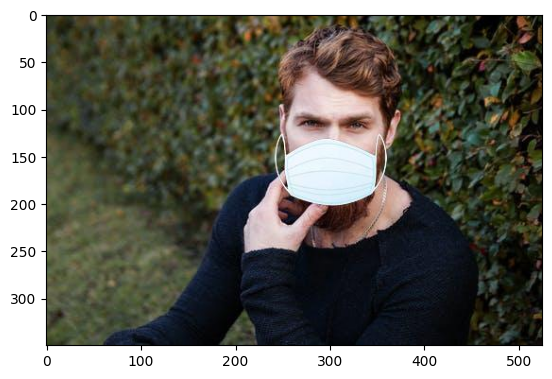

In [27]:
#displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

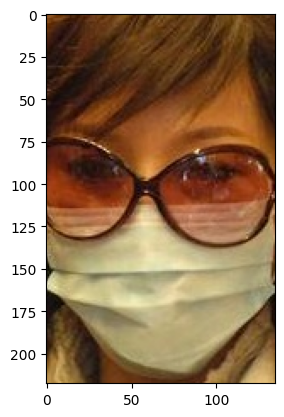

In [28]:
img = mpimg.imread('/content/data/with_mask/with_mask_10.jpg')
imgplot = plt.imshow(img)
plt.show()

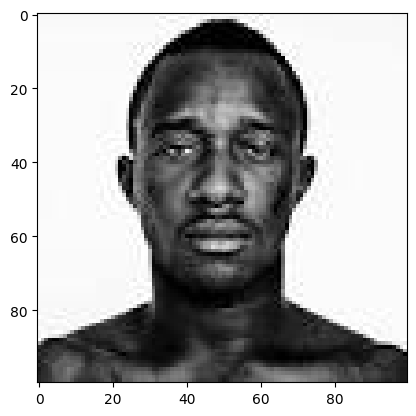

In [29]:
#displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

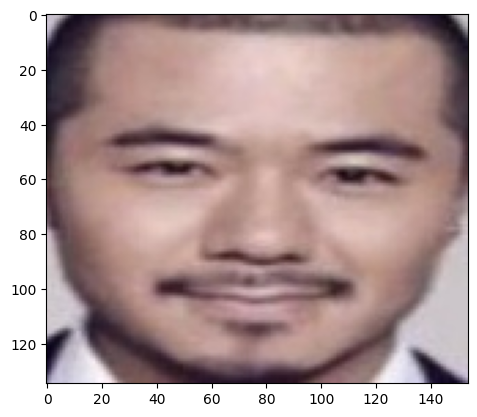

In [30]:
img = mpimg.imread('/content/data/without_mask/without_mask_10.jpg')
imgplot = plt.imshow(img)
plt.show()

Resizing all the images and saving these images in different folders

In [31]:
# crearting directories for resized images
os.mkdir('with_mask_resized')
os.mkdir('without_mask_resized')

In [32]:
# resize with_mask images

with_mask_folder = '/content/data/with_mask'
with_mask_resized_folder = '/content/with_mask_resized'

for filename in os.listdir(with_mask_folder):
  img_path = with_mask_folder + '/' + filename
  img = Image.open(img_path)
  img = img.resize((128,128))
  img = img.convert('RGB')

  newImgPath = with_mask_resized_folder + '/' + filename
  img.save(newImgPath)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [33]:
# resize without_mask images

without_mask_folder = '/content/data/without_mask'
without_mask_resized_folder = '/content/without_mask_resized'

for filename in os.listdir(without_mask_folder):
  img_path = without_mask_folder + '/' + filename
  img = Image.open(img_path)
  img = img.resize((128,128))
  img = img.convert('RGB')

  newImgPath = without_mask_resized_folder + '/' + filename
  img.save(newImgPath)

Resized Images

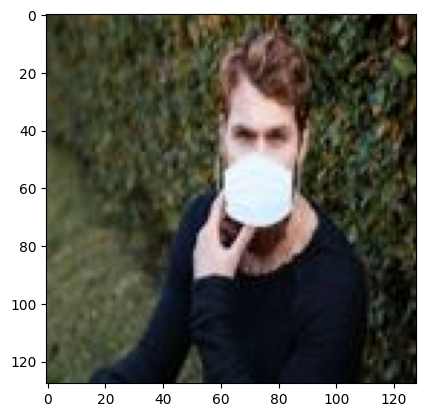

In [34]:
#displaying with mask image
img = mpimg.imread('/content/with_mask_resized/with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

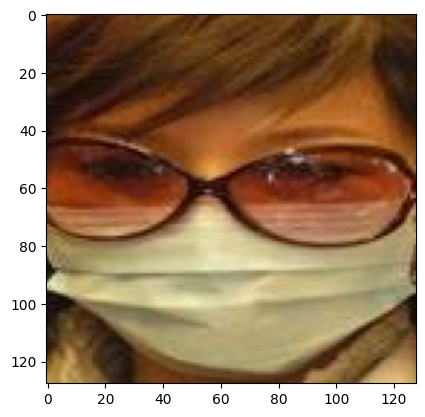

In [35]:
img = mpimg.imread('/content/with_mask_resized/with_mask_10.jpg')
imgplot = plt.imshow(img)
plt.show()

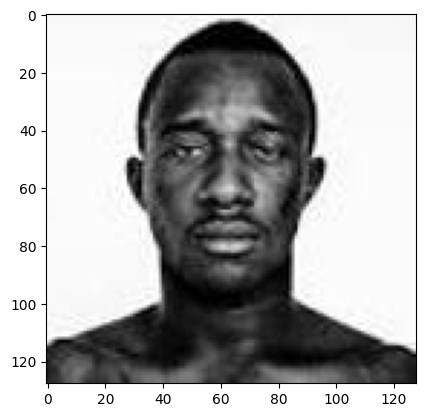

In [36]:
#displaying without mask image
img = mpimg.imread('/content/without_mask_resized/without_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

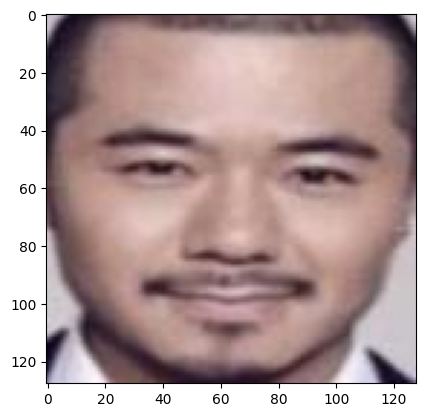

In [37]:
img = mpimg.imread('/content/without_mask_resized/without_mask_10.jpg')
imgplot = plt.imshow(img)
plt.show()

All the images have been resized to (128,128)

**Converting Images into numpy arrays**

In [38]:
import cv2
import glob

In [39]:
#reading with_mask images
imdir = '/content/with_mask_resized/'
ext = ['png', 'jpg']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

with_mask_images = np.asarray([cv2.imread(file) for file in files])

In [40]:
#reading without_mask images
imdir = '/content/without_mask_resized/'
ext = ['png', 'jpg']    # Add image formats here

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

without_mask_images = np.asarray([cv2.imread(file) for file in files])

In [41]:
print(with_mask_images[0])

[[[ 60  48  46]
  [ 60  48  46]
  [ 60  48  46]
  ...
  [ 97  89  89]
  [107  95  95]
  [110  98  98]]

 [[ 60  48  46]
  [ 61  49  47]
  [ 61  49  47]
  ...
  [100  92  92]
  [109  99  99]
  [116 104 102]]

 [[ 61  49  47]
  [ 61  49  47]
  [ 61  49  47]
  ...
  [ 98  91  88]
  [107  98  95]
  [111 102  98]]

 ...

 [[ 45  36  33]
  [ 45  36  33]
  [ 45  36  33]
  ...
  [125  97  86]
  [119  93  81]
  [109  83  71]]

 [[ 45  36  33]
  [ 45  36  33]
  [ 45  36  33]
  ...
  [118  90  79]
  [110  82  71]
  [ 96  68  57]]

 [[ 45  36  33]
  [ 45  36  33]
  [ 45  36  33]
  ...
  [112  84  73]
  [ 99  71  60]
  [ 81  53  42]]]


In [42]:
print(with_mask_images.shape)
print(without_mask_images.shape)

(3725, 128, 128, 3)
(3828, 128, 128, 3)


In [43]:
combined_images = np.concatenate((with_mask_images, without_mask_images))
print(combined_images.shape)

(7553, 128, 128, 3)


In [44]:
# data and labels
X = combined_images
y = np.asarray(labels)

Train Test Split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [47]:
print(X.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7553, 128, 128, 3)
(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


In [48]:
# standardizing the data

x_train_std = x_train/255
x_test_std = x_test/255

In [49]:
print(x_train[0])

[[[111 113 113]
  [158 160 160]
  [193 194 192]
  ...
  [216 221 219]
  [217 222 220]
  [218 223 221]]

 [[140 142 142]
  [107 109 109]
  [150 151 149]
  ...
  [214 219 217]
  [214 219 217]
  [214 219 217]]

 [[217 219 219]
  [160 162 162]
  [106 107 105]
  ...
  [214 219 217]
  [215 220 218]
  [216 221 219]]

 ...

 [[176 179 194]
  [178 181 196]
  [174 177 192]
  ...
  [127 138 142]
  [139 150 154]
  [176 187 191]]

 [[178 181 196]
  [176 179 194]
  [174 177 192]
  ...
  [127 138 142]
  [132 143 147]
  [176 187 191]]

 [[173 176 191]
  [170 173 188]
  [171 174 189]
  ...
  [130 141 145]
  [126 137 141]
  [168 179 183]]]


In [50]:
print(x_train_std[0])

[[[0.43529412 0.44313725 0.44313725]
  [0.61960784 0.62745098 0.62745098]
  [0.75686275 0.76078431 0.75294118]
  ...
  [0.84705882 0.86666667 0.85882353]
  [0.85098039 0.87058824 0.8627451 ]
  [0.85490196 0.8745098  0.86666667]]

 [[0.54901961 0.55686275 0.55686275]
  [0.41960784 0.42745098 0.42745098]
  [0.58823529 0.59215686 0.58431373]
  ...
  [0.83921569 0.85882353 0.85098039]
  [0.83921569 0.85882353 0.85098039]
  [0.83921569 0.85882353 0.85098039]]

 [[0.85098039 0.85882353 0.85882353]
  [0.62745098 0.63529412 0.63529412]
  [0.41568627 0.41960784 0.41176471]
  ...
  [0.83921569 0.85882353 0.85098039]
  [0.84313725 0.8627451  0.85490196]
  [0.84705882 0.86666667 0.85882353]]

 ...

 [[0.69019608 0.70196078 0.76078431]
  [0.69803922 0.70980392 0.76862745]
  [0.68235294 0.69411765 0.75294118]
  ...
  [0.49803922 0.54117647 0.55686275]
  [0.54509804 0.58823529 0.60392157]
  [0.69019608 0.73333333 0.74901961]]

 [[0.69803922 0.70980392 0.76862745]
  [0.69019608 0.70196078 0.76078431]


Building the Neural Network

In [51]:
import tensorflow as tf
import keras

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128,128,3)),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [54]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
model.fit(x_train_std, y_train, epochs=9)

Epoch 1/9
189/189 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.6095 - loss: 1.9658
Epoch 2/9
189/189 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - accuracy: 0.7902 - loss: 0.4594
Epoch 3/9
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.8282 - loss: 0.3946
Epoch 4/9
189/189 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.8557 - loss: 0.3454
Epoch 5/9
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.8639 - loss: 0.3342
Epoch 6/9
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.8810 - loss: 0.2979
Epoch 7/9
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8866 - loss: 0.2875
Epoch 8/9
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.8945 - loss: 0.2725
Epoch 9/9
189/189 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.8856 - loss: 0.2808


In [56]:
score, acc = model.evaluate(x_test_std, y_test)
print('Test data loss:', score)
print('Test data accuracy:', acc)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8940 - loss: 0.2689
Test data loss: 0.2798402011394501
Test data accuracy: 0.8927862048149109


**Building a Predictive System**

In [57]:
from google.colab.patches import cv2_imshow

Enter the image path: /content/with_mask_resized/with_mask_1.jpg


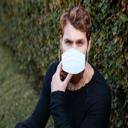

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[0.38081735 0.711614  ]]
1
The person in the image is wearing a mask


In [58]:
]input_image_path = input('Enter the image path: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if  input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

Enter the image path: /content/without_mask_resized/without_mask_1009.jpg


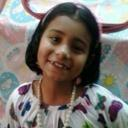

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[0.29695538 0.12634073]]
0
The person in the image is not wearing a mask


In [61]:
input_image_path = input('Enter the image path: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if  input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')